# Investigar si una persona va a ganar o no mas de 50K al año

El método de los k vecinos más cercanos (en inglés, k-nearest neighbors, es un método de clasificación supervisada (Aprendizaje, estimación basada en un conjunto de entrenamiento y prototipos), que sirve para estimar la función de densidad de las predictoras por cada clase

- Support vector machine

### Autores
   * Efrén Jiménez

## Análisis del Problema

El objetivo del proyecto es predecir si una persona gana más de 50.000 al año dadas sus variaciones demográficas. Para lograr esto, se la tecnica de KNN.

![blackbell](https://storage.googleapis.com/kaggle-datasets-images/new-version-temp-images/default-backgrounds-18.png-2750279/dataset-cover.png)

### Librerías

In [189]:
!pip install numpy
!pip install pandas

In [190]:
import warnings
warnings.filterwarnings('ignore')
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import missingno as msno 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Entendimiento de los Datos

El total es de 2000 registro con 21 columnas dentro del set de datos de entrenamiento

age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income

In [191]:
#Cargar los datos
income_evaluation = pd.read_csv(r"data/income_evaluation.csv")

In [192]:
income_evaluation.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [193]:
income_evaluation["income"]=np.select([income_evaluation[" income"]=='<=50K',income_evaluation[" income"]==' >50K'],[0,1])

In [194]:
income_evaluation=income_evaluation.drop(columns=[' income'])

In [195]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
income_evaluation["workclass"] = lb_make.fit_transform(income_evaluation[" workclass"])
income_evaluation["education"] = lb_make.fit_transform(income_evaluation[" education"])
income_evaluation["marital-status"] = lb_make.fit_transform(income_evaluation[" marital-status"])
income_evaluation["occupation"] = lb_make.fit_transform(income_evaluation[" occupation"])
income_evaluation["relationship"] = lb_make.fit_transform(income_evaluation[" relationship"])
income_evaluation["race"] = lb_make.fit_transform(income_evaluation[" race"])
income_evaluation["sex"] = lb_make.fit_transform(income_evaluation[" sex"])
income_evaluation["native-country"] = lb_make.fit_transform(income_evaluation[" native-country"])

In [196]:
#Primeros registros
income_evaluation.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   ...   native-country  income  workclass education  marital-status  \
0  ...    United-States       0          7         9               4   
1  ...    United-States       0          6         9               2   
2  ...    United-States       0          4        11               0   
3  ...    United-States       0          4         1               2   
4  ...             Cuba       0          4         9               2   

   occupation  relationship  race  sex  native-country  
0           1             1     4    1              39  
1           4             0     4    1              39  
2           6             1     4    1              39  
3           6             0     2    1              39  
4          10             5     2    0               5  

[5 rows x 23 columns]

In [197]:
#Describir dataset
income_evaluation.describe()

age        fnlwgt   education-num   capital-gain  \
count  32561.000000  3.256100e+04    32561.000000   32561.000000   
mean      38.581647  1.897784e+05       10.080679    1077.648844   
std       13.640433  1.055500e+05        2.572720    7385.292085   
min       17.000000  1.228500e+04        1.000000       0.000000   
25%       28.000000  1.178270e+05        9.000000       0.000000   
50%       37.000000  1.783560e+05       10.000000       0.000000   
75%       48.000000  2.370510e+05       12.000000       0.000000   
max       90.000000  1.484705e+06       16.000000   99999.000000   

        capital-loss   hours-per-week        income     workclass  \
count   32561.000000     32561.000000  32561.000000  32561.000000   
mean       87.303830        40.437456      0.240810      3.868892   
std       402.960219        12.347429      0.427581      1.455960   
min         0.000000         1.000000      0.000000      0.000000   
25%         0.000000        40.000000      0.000000      4.000000   
50%         0.000000        40.000000      0.000000      4.000000   
75%         0.000000        45.000000      0.000000      4.000000   
max      4356.000000        99.000000      1.000000      8.000000   

          education  marital-status    occupation  relationship          race  \
count  32561.000000    32561.000000  32561.000000  32561.000000  32561.000000   
mean      10.298210        2.611836      6.572740      1.446362      3.665858   
std        3.870264        1.506222      4.228857      1.606771      0.848806   
min        0.000000        0.000000      0.000000      0.000000      0.000000   
25%        9.000000        2.000000      3.000000      0.000000      4.000000   
50%       11.000000        2.000000      7.000000      1.000000      4.000000   
75%       12.000000        4.000000     10.000000      3.000000      4.000000   
max       15.000000        6.000000     14.000000      5.000000      4.000000   

                sex  native-country  
count  32561.000000    32561.000000  
mean       0.669205       36.718866  
std        0.470506        7.823782  
min        0.000000        0.000000  
25%        0.000000       39.000000  
50%        1.000000       39.000000  
75%        1.000000       39.000000  
max        1.000000       41.000000

In [198]:
#Información del dataset
income_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14  income           32561 non-null  int32 
 15  workclass        32561 non-null  int32 
 16  education        32561 non-null  int32 
 17  marital-status   32561 non-null

In [199]:
# Numero de registros del dataset
print("Cantidad de registros:",len(income_evaluation))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(income_evaluation.columns))
# Tipos de datos del dataset
print("Tipo de datos:",income_evaluation.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",income_evaluation.shape)

Cantidad de registros: 32561
Cantidad de columnas: 23
Tipo de datos: [dtype('int64') dtype('O') dtype('int32')]
Filas y columnas: (32561, 23)


In [200]:
# Chekear valores nulos
print(income_evaluation.isnull().any().sum(), ' / ', len(income_evaluation.columns))

0  /  23


In [201]:
#Cuales columnnas estas con valores nulos
income_evaluation.isnull().sum()[income_evaluation.isnull().sum() > 0]

Series([], dtype: int64)

In [202]:
# N/A= Valores vacios 
#Usar solo si se quiere eliminar los registros que contienen columnas vacías
income_evaluation=income_evaluation.dropna() 

In [203]:
income_evaluation

age          workclass   fnlwgt    education   education-num  \
0       39          State-gov    77516    Bachelors              13   
1       50   Self-emp-not-inc    83311    Bachelors              13   
2       38            Private   215646      HS-grad               9   
3       53            Private   234721         11th               7   
4       28            Private   338409    Bachelors              13   
...    ...                ...      ...          ...             ...   
32556   27            Private   257302   Assoc-acdm              12   
32557   40            Private   154374      HS-grad               9   
32558   58            Private   151910      HS-grad               9   
32559   22            Private   201490      HS-grad               9   
32560   52       Self-emp-inc   287927      HS-grad               9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  ...   native-country  income  workclass education  \
0         Male  ...    United-States       0          7         9   
1         Male  ...    United-States       0          6         9   
2         Male  ...    United-States       0          4        11   
3         Male  ...    United-States       0          4         1   
4       Female  ...             Cuba       0          4         9   
...        ...  ...              ...     ...        ...       ...   
32556   Female  ...    United-States       0          4         7   
32557     Male  ...    United-States       1          4        11   
32558   Female  ...    United-States       0          4        11   
32559     Male  ...    United-States       0          4        11   
32560   Female  ...    United-States       1          5        11   

       marital-status  occupation  relationship  race  sex  native-country  
0                   4           1             1     4    1              39  
1                   2           4             0     4    1              39  
2                   0           6             1     4    1              39  
3                   2           6             0     2    1              39  
4                   2          10             5     2    0               5  
...               ...         ...           ...   ...  ...             ...  
32556               2          13             5     4    0              39  
32557               2           7             0     4    1              39  
32558               6           1             4     4    0              39  
32559               4           1             3     4    1              39  
32560               2           4             5     4    0              39  

[32561 rows x 23 columns]

In [204]:
income_evaluation["income"].unique()

array([0, 1])

In [205]:
income_evaluation['income'].value_counts(normalize=True)

0    0.75919
1    0.24081
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='count'>

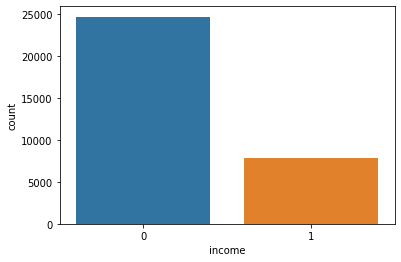

In [206]:
sns.countplot(income_evaluation['income'])

## Exploración de los Datos

#### Gráficos exploratorios

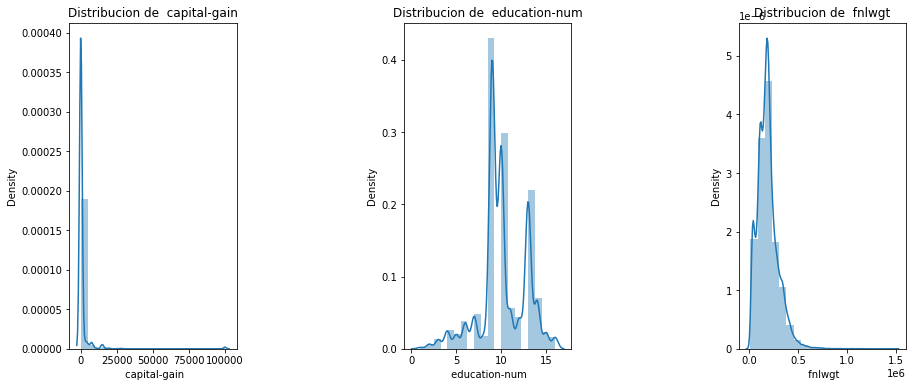

In [207]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in [' capital-gain' , ' education-num' , ' fnlwgt']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =1 , wspace = 1)
    sns.distplot(income_evaluation[x] , bins = 20)
    plt.title('Distribucion de {}'.format(x))
plt.show()

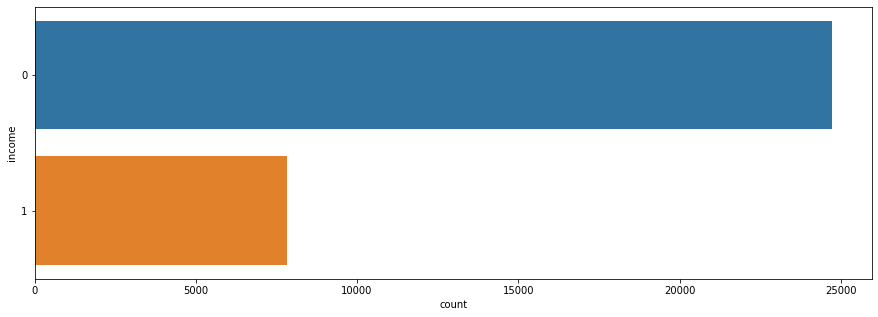

In [208]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'income' , data = income_evaluation)
plt.show()

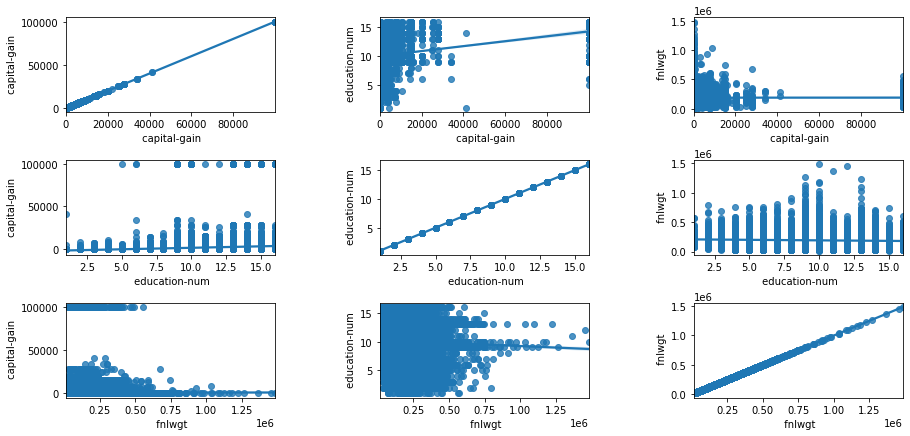

In [209]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in [' capital-gain' , ' education-num' , ' fnlwgt']:
    for y in [' capital-gain' , ' education-num' , ' fnlwgt']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = income_evaluation)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [210]:
income_evaluation[" hours-per-week"].tail(17).value_counts().index


Int64Index([40, 20, 30, 60, 50, 45, 11, 38], dtype='int64')

Text(0.5, 1.0, 'Distribucion de las horas trabajadas')

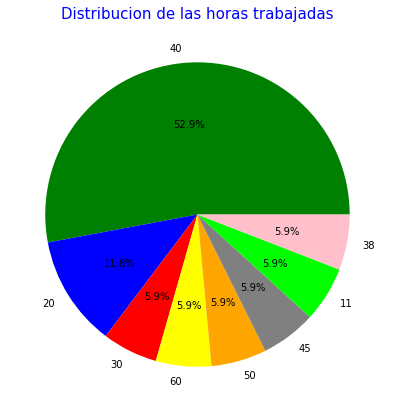

In [211]:
labels = income_evaluation[" hours-per-week"].tail(17).value_counts().index
colors = ['green','blue','red','yellow','orange','gray','lime','pink']
explode = [0,0,0,0,0,0,0,0,]
sizes = income_evaluation[" hours-per-week"].tail(17).value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribucion de las horas trabajadas',color = 'blue',fontsize = 15)

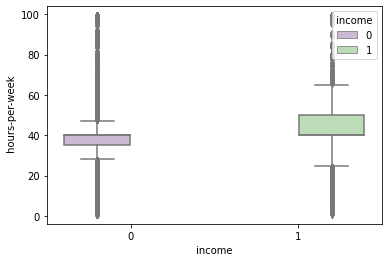

In [212]:
sns.boxplot(x="income", y=" hours-per-week", hue="income", data=income_evaluation, palette="PRGn")
plt.show()

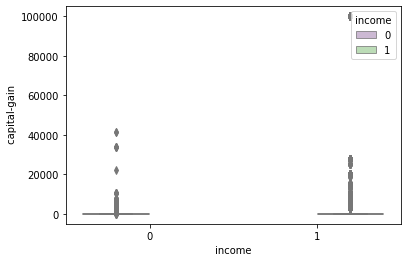

In [213]:
sns.boxplot(x="income", y=" capital-gain", hue="income", data=income_evaluation, palette="PRGn")
plt.show()

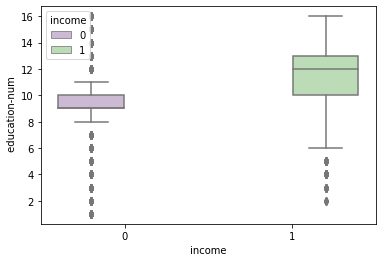

In [214]:
sns.boxplot(x="income", y=" education-num", hue="income", data=income_evaluation, palette="PRGn")
plt.show()

Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:

In [215]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(income_evaluation[['age', 'workclass', ' fnlwgt', 'education', ' education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', 'native-country']],income_evaluation[["income"]], test_size=0.3, random_state=1234)

>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [216]:
print("Entrenamiento dimensiones",X_train.shape)
print("Descripción")
X_train.describe

Entrenamiento dimensiones (22792, 14)
Descripción


<bound method NDFrame.describe of        age  workclass   fnlwgt  education   education-num  marital-status  \
29700   37          4    34146         11               9               2   
1529    37          4    26898         11               9               0   
27477   26          4   190762         15              10               2   
31950   35          4   189092          9              13               2   
4732    23          4   260019          5               4               4   
...    ...        ...      ...        ...             ...             ...   
27852   24          4   223367          1               7               4   
23605   20          4   127185         15              10               4   
1318    41          7   144928          9              13               2   
25299   40          4   199303         11               9               2   
27439   38          4    38312          9              13               2   

       occupation  relationship  race  se

In [217]:
print("Pruebas dimensiones",X_test.shape)
print("Descripción")
X_test.describe

Pruebas dimensiones (9769, 14)
Descripción


<bound method NDFrame.describe of        age  workclass   fnlwgt  education   education-num  marital-status  \
1055    32          4    87643          9              13               2   
26305   27          4   207352          9              13               2   
9568    73          7    74040          5               4               0   
15071   39          4   174924         11               9               5   
2012    31          4   264936         15              10               4   
...    ...        ...      ...        ...             ...             ...   
19433   59          0   367984          9              13               2   
12825   26          4   144483          8              11               0   
23420   55          4    98361          9              13               2   
6259    24          2   150084         15              10               5   
1439    47          4    67716         11               9               2   

       occupation  relationship  race  se

## Modelo de Machine Learning

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [218]:
#-------------- 
# K-NEIGHBOURS 
#--------------
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=2,weights= 'uniform')

In [219]:
# Entrenamos nuestro modelo
classifier4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [220]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred1 = classifier4.predict( X_test )

In [221]:
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [222]:
predict_values=classifier4.predict_proba(X_test)
predict_values[:, 1]

array([0. , 0. , 0.5, ..., 1. , 0. , 0. ])

In [223]:
## Evaluación

In [224]:
np.array(y_pred1)

array([0, 0, 0, ..., 1, 0, 0])

In [225]:
matrix=confusion_matrix(np.array(y_test), np.array(y_pred1))
matrix

array([[7051,  418],
       [1664,  636]], dtype=int64)

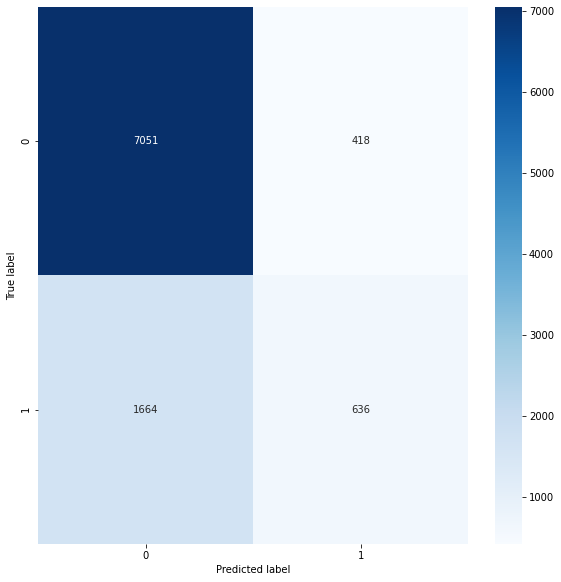

In [226]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,fmt='g', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [227]:
scoresSVC = cross_val_score( classifier4, X_test, y_test, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on model Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

scoresSVC = cross_val_score( classifier4, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))
classifier4.score(X_train, y_train)

Mean kernel-SVM CrossVal Accuracy on model Set 0.79, with std=0.01
Mean kernel-SVM CrossVal Accuracy on Train Set 0.78, with std=0.01


0.8672341172341173

In [228]:
auc = roc_auc_score(y_test, predict_values[:, 1])
print('AUC: %.2f' % auc)

AUC: 0.66


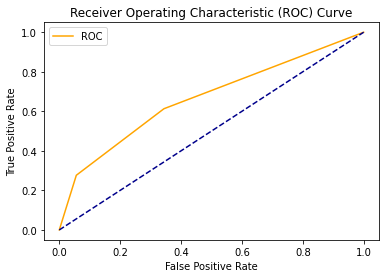

In [229]:
fpr, tpr, thresholds = roc_curve(y_test, predict_values[:, 1])
plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [230]:
(matrix[[0]][0][0] + matrix[[1]][0][1])/X_test.shape[0]

0.786876855358788

\begin{equation}Exactitud=\frac{VP+VN}{Total}\end{equation}

In [231]:
(matrix[[0]][0][0])/X_test.shape[0]

0.7217729552666599

\begin{equation}\text{Sensibilidad}=\frac{VP}{\text{Total Positivos}}\end{equation}

In [232]:
(matrix[[0]][0][0])/(matrix[[0]][0][0] + matrix[[1]][0][0])

0.8090648307515778

\begin{equation}\text{Precisión}=\frac{VP}{\text{Total clasificados positivos}}\end{equation}

In [233]:
(matrix[[1]][0][1])/(matrix[[0]][0][1] + matrix[[1]][0][1])

0.603415559772296

\begin{equation}\text{Especificidad}=\frac{VN}{\text{Total Negativos}}\end{equation}

## Resultados
En conclusión, los valores obtenidos por la clasifición verdaderos positivos no son buenos. Por lo cual no se recomienda utilizar este modelo de machine learning.